In [1]:
import pandas_datareader as pdr
import pandas_datareader.data as web

from pprint import pprint
import numpy as np
import pandas as pd
#import pyfolio as pf
#import quantstats as qs
from datetime import date
from pandas_datareader.famafrench import get_available_datasets
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.api import OLS, add_constant
from pathlib import Path
import seaborn as sns 
from linearmodels.asset_pricing import TradedFactorModel, LinearFactorModel, LinearFactorModelGMM
#import finance_db

/Users/syang14/anaconda3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/syang14/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# We will be using the five Fama—French factors that result from sorting stocks first into three size groups 
# and then into two for each of the remaining three firm-specific factors.

# Hence, the factors involve three sets of value-weighted portfolios formed as 3 x 2 sorts 
# on size and book-to-market, size and operating profitability, and size and investment. 
# The risk factor values are computed as the average returns of the portfolios (PF) Mkt-RF, SMB, HML, RMW, CMA, RF

In [3]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'

In [4]:
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2022-12')[0]

In [5]:
ff_factor_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.35,0.36,-1.17,0.42,0.00
2010-02,3.40,1.46,3.19,-0.29,1.43,0.00
2010-03,6.31,1.85,2.18,-0.62,1.71,0.01
2010-04,2.00,4.99,2.95,0.62,1.76,0.01
2010-05,-7.89,0.03,-2.42,1.34,-0.24,0.01


In [6]:
# Fama and French also make numerous portfolios that we can illustrate the estimation of the risk factor exposures, 
# as well as the value of the risk premia available in the market for a given time period. 
# We will use a panel of the 17 industry portfolios at a monthly frequency.

ff_portfolio = '17_Industry_Portfolios'

In [7]:
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2022-12')[0]

In [8]:
ff_portfolio_data.head(10)

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.15,-12.94,-4.79,-3.63,-3.50,-4.33,-0.45,-2.88,-12.49,-2.75,-7.34,0.39,-2.13,-4.44,-1.29,-0.65,-3.91
2010-02,1.75,12.41,2.32,7.18,9.80,5.77,1.33,5.92,4.48,7.41,7.27,6.60,6.16,-0.42,3.69,2.91,2.57
2010-03,4.97,7.33,3.20,11.24,5.51,7.46,3.25,5.55,11.99,5.00,7.78,8.85,8.99,3.12,6.50,8.31,6.20
2010-04,-1.35,-0.75,4.31,4.92,6.89,2.56,-1.97,10.81,-2.94,3.54,4.82,6.57,2.92,2.85,1.34,1.13,1.42
2010-05,-4.85,-8.00,-10.14,-6.28,-5.42,-10.62,-6.25,-8.11,-7.47,-9.29,-8.07,-7.19,-7.55,-6.29,-5.72,-9.10,-8.03
2010-06,-1.96,-7.00,-6.23,-9.76,-8.74,-8.07,-0.08,-14.13,-13.29,-6.34,-5.97,-8.10,-7.22,-0.70,-9.19,-7.23,-4.82
2010-07,6.69,9.65,7.37,8.15,3.94,14.83,3.44,4.78,8.26,10.70,7.62,16.11,9.68,6.81,4.92,6.56,7.21
2010-08,-0.63,-0.46,-3.33,-7.35,-3.82,0.02,-0.39,-4.53,-8.75,-2.49,-9.12,-8.50,-6.66,0.37,-3.40,-8.48,-4.27
2010-09,3.20,11.76,8.99,17.33,11.61,9.95,7.04,10.57,12.16,10.73,14.22,12.06,10.12,3.65,12.47,7.24,10.44


In [9]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [10]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns, index=ff_portfolio_data.columns)

In [11]:
betas

,Mkt-RF,SMB,HML,RMW,CMA,RF
Food,0.642850,-0.184374,-0.035146,0.389361,0.337719,-1.592148
Mines,1.148270,0.266461,0.077443,0.166094,0.651595,7.159399
Oil,1.145248,0.400527,0.951374,-0.268662,0.413545,-0.110273
Clths,1.055309,0.425205,-0.123724,0.665383,-0.121720,6.491894
Durbl,1.109011,0.548760,-0.191702,0.147933,0.062605,-1.554034
Chems,1.159944,0.162561,0.282827,0.082095,0.132637,-2.765491
Cnsum,0.662100,-0.195501,-0.336337,0.204523,0.642207,-1.757633
Cnstr,1.081793,0.310943,0.061200,0.454702,-0.034033,2.569794
Steel,1.446773,0.560996,0.460061,0.393108,0.350462,3.389709
FabPr,1.024779,0.384169,0.047912,0.179277,-0.083545,3.790183


In [12]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], exog=betas).fit()
    lambdas.append(step2.params)

In [13]:
lambdas = pd.DataFrame(lambdas, index=ff_portfolio_data.index, columns=betas.columns.tolist())

In [14]:
lambdas.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-2.718978,-3.411199,0.744814,1.690069,-6.921749,-0.428894
2010-02,4.257385,7.800781,-6.266359,-4.175735,1.572553,0.332415
2010-03,6.433832,-1.493223,0.759572,4.505491,-2.933965,0.029077
2010-04,2.198603,4.060698,-0.578548,2.428087,-5.379991,-0.179035
2010-05,-7.812118,4.896211,-2.283435,0.047727,-0.304219,-0.081959
2010-06,-5.507485,-4.885659,-1.460162,-5.119168,3.771267,0.033048
2010-07,8.061218,-2.992585,2.121381,2.336637,-0.858565,-0.292825
2010-08,-4.571671,-0.933281,-0.558435,-0.880171,6.456306,-0.005320
2010-09,9.648660,3.160824,-5.541593,-0.181544,-1.403270,0.297946


In [15]:
# Finally, we compute the average for the 96 periods to obtain our factor risk premium
lambdas.mean()

Mkt-RF    1.129214
SMB      -0.885835
HML       0.052411
RMW       0.616514
CMA      -0.465153
RF       -0.016956
dtype: float64

In [16]:
model = LinearFactorModel(portfolios=ff_portfolio_data, factors=ff_factor_data)
result = model.fit()

In [17]:
result

LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 17   R-squared:                      0.7137
No. Factors:                          6   J-statistic:                    9.5466
No. Observations:                   156   P-value                         0.5716
Date:                  Fri, Sep 29 2023   Distribution:                 chi2(11)
Time:                          14:33:06                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1292     0.3743     3.0169     0.0026      0.3956      1.8628
SMB           -0.8858     0.4333    -2.0446     0.0409     -1.7350     -0.0367
HML            0.0524     0.5005     0.1047     0.9166     -0.9285      1.0333
RMW            0.6165     0.5844     1.0549     0.2915     -0.5290      1.7620
CMA           -0.4652     0.3985    -1.1674     0.2431     -1.2461      0.3158
RF            -0.0170     0.0323    -0.5255     0.5992     -0.0802      0.0463
==============================================================================

Covariance estimator:
HeteroskedasticCovariance
See full_summary for complete results
LinearFactorModelResults, id: 0x7f78b9a69ba8

In [18]:
#Equity Data - Vanguard Sector & specialty ETFs

In [104]:
import yfinance as yf
import datetime as dt
import re

In [31]:
symbols = ['VDC', 'VDE', 'VFH', 'VNQ']
secs = ['CONSUMER ST', 'ENERGY', 'FINANCIALS', 'REAL ESTATE']

In [35]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

In [50]:
prices = yf.download(symbols, start=start, end=end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [51]:
#df = web.DataReader('VCR', 'yahoo', start, end)
print(prices)

                   VDC        VDE        VFH        VNQ
Date                                                   
2010-01-04   47.256664  59.149315  22.314371  26.038345
2010-01-05   47.299377  59.754776  22.563396  26.009113
2010-01-06   47.292259  60.442810  22.601139  25.962347
2010-01-07   47.292259  60.298317  23.038813  26.242910
2010-01-08   47.035892  60.752399  22.948261  26.050028
...                ...        ...        ...        ...
2020-12-23  160.665268  47.125885  67.422859  75.544235
2020-12-24  161.349258  46.731682  67.451096  76.205605
2020-12-28  162.398697  46.391224  67.705154  76.659866
2020-12-29  161.892700  46.122448  67.338165  76.005753
2020-12-30  161.986420  46.883987  67.742805  76.423668

[2768 rows x 4 columns]


In [52]:
SPY = yf.download('SPY', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [53]:
SPY.head()

Date
2010-01-04 00:00:00-05:00    87.483208
2010-01-05 00:00:00-05:00    87.714798
2010-01-06 00:00:00-05:00    87.776520
2010-01-07 00:00:00-05:00    88.147041
2010-01-08 00:00:00-05:00    88.440422
Name: Adj Close, dtype: float64

In [58]:
#prices.columns = secs
prices['SPY'] = SPY.values

In [59]:
returns0 = np.log(prices).diff()
returns0 = returns0.dropna(how='all').dropna(axis=1)
returns0.head(10)

,VDC,VDE,VFH,VNQ,SPY
Date,,,,,
2010-01-05,0.000903,0.010184,0.011098,-0.001123,0.002644
2010-01-06,-0.000151,0.011449,0.001671,-0.001800,0.000703
2010-01-07,0.000000,-0.002393,0.019180,0.010749,0.004212
2010-01-08,-0.005436,0.007502,-0.003938,-0.007377,0.003323
2010-01-11,0.003476,-0.000793,-0.000329,0.005816,0.001395
2010-01-12,0.004516,-0.015880,-0.012246,-0.016871,-0.009370
2010-01-13,0.006885,0.005054,0.009281,0.019990,0.008410
2010-01-14,-0.000597,0.002746,0.006577,-0.000890,0.002701
2010-01-15,-0.005688,-0.008146,-0.017524,-0.007596,-0.011288


In [60]:
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

In [61]:
tmp_fts = returns0.copy()

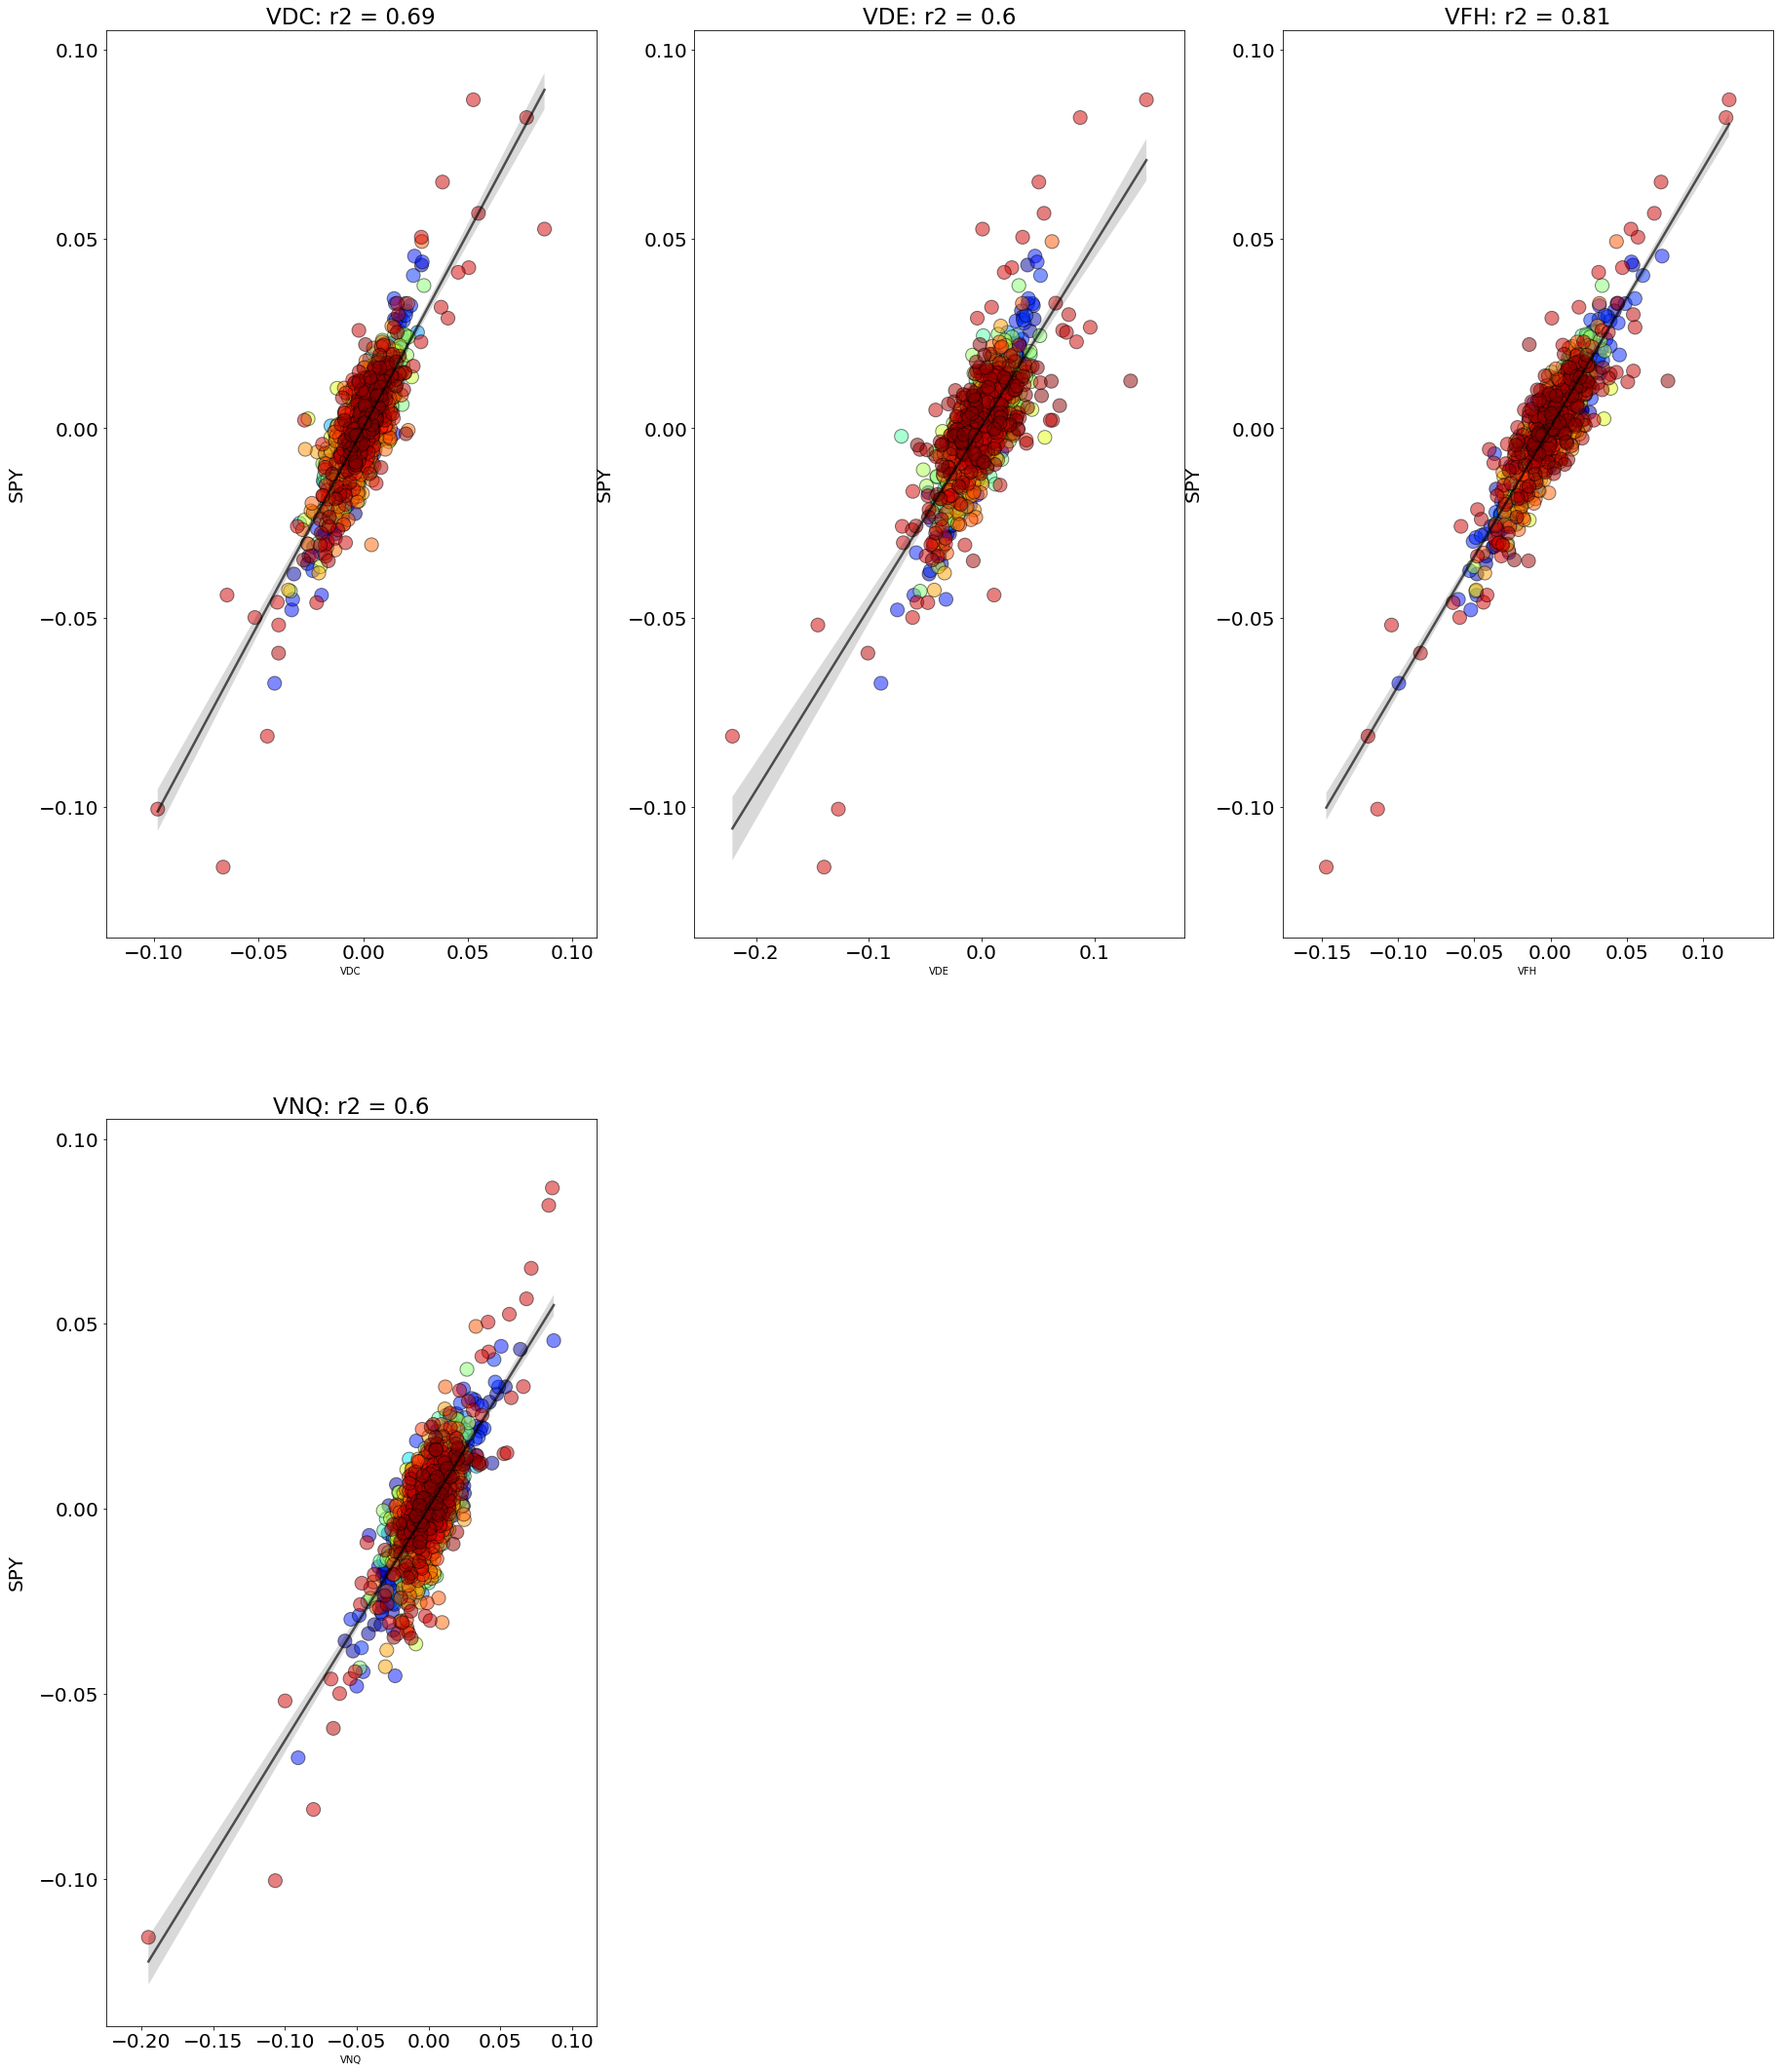

In [64]:
# Plot ETF correlations with SPY return
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(10, 40))
plt.subplots_adjust(right=2.5)
plt.subplots_adjust(top=2)

cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(tmp_fts))

for i, feature in enumerate(list(tmp_fts), 1):
    if(feature=='SPY'):
        break
        
    ic, pval = spearmanr(tmp_fts[feature], tmp_fts['SPY'])
    R2 = r2(tmp_fts[feature], tmp_fts['SPY'])
        
    plt.subplot(len(list(tmp_fts.columns)), 3, i)
    sc = plt.scatter(tmp_fts[feature], tmp_fts['SPY'], s=200, 
                 edgecolor='k', alpha=0.5, label='Return Data', c=colors, cmap=cm)
    j = sns.regplot(tmp_fts[feature], tmp_fts['SPY'], data=tmp_fts, scatter=False, label=False, 
                line_kws={'color':'k','lw':2.5, 'alpha':0.65})
    
    plt.ylabel('SPY', size=23, labelpad=14, fontsize=20, fontweight='medium')
    
    plt.title(f'{feature}: r2 = {round(R2,2)}', fontsize=23, fontweight='medium')
    plt.grid(False)
            
    for j in range(2):
        plt.tick_params(axis='x', labelsize=20)
        plt.tick_params(axis='y', labelsize=20)
        
plt.show()

In [101]:
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.35,0.36,-1.17,0.42,0.00
2010-02,3.40,1.46,3.19,-0.29,1.43,0.00
2010-03,6.31,1.85,2.18,-0.62,1.71,0.01
2010-04,2.00,4.99,2.95,0.62,1.76,0.01
2010-05,-7.89,0.03,-2.42,1.34,-0.24,0.01
...,...,...,...,...,...,...
2022-08,-3.77,1.50,0.29,-4.70,1.35,0.19
2022-09,-9.35,-1.05,0.04,-1.46,-0.77,0.19
2022-10,7.83,1.88,8.00,3.33,6.69,0.23


In [102]:
print(ff_factor_data.shape, returns0.shape)

(156, 6) (2767, 5)


In [116]:
RF = []
for index, row in returns0.iterrows():
    #print(index, row['SPY'])
    for idx, rate in ff_factor_data.iterrows():
        if(re.match(str(idx), str(index))):
            RF.append(rate['RF'])
            #print(idx, rate['RF'])
            break;

In [121]:
returns0['RF'] = RF
returns0.tail()

,VDC,VDE,VFH,VNQ,SPY,RF
Date,,,,,,
2020-12-23,0.004149,0.025025,0.016322,-0.006488,0.000898,0.01
2020-12-24,0.004248,-0.008400,0.000419,0.008717,0.003883,0.01
2020-12-28,0.006483,-0.007312,0.003759,0.005943,0.008554,0.01
2020-12-29,-0.003121,-0.005811,-0.005435,-0.008569,-0.001910,0.01
2020-12-30,0.000579,0.016376,0.005991,0.005483,0.001426,0.01


In [152]:
excess_returns = returns0.sub(returns0.RF, axis=0)
excess_returns.pop('RF')
excess_returns.tail()

,VDC,VDE,VFH,VNQ,SPY
Date,,,,,
2020-12-23,-0.005851,0.015025,0.006322,-0.016488,-0.009102
2020-12-24,-0.005752,-0.018400,-0.009581,-0.001283,-0.006117
2020-12-28,-0.003517,-0.017312,-0.006241,-0.004057,-0.001446
2020-12-29,-0.013121,-0.015811,-0.015435,-0.018569,-0.011910
2020-12-30,-0.009421,0.006376,-0.004009,-0.004517,-0.008574


In [156]:
from factor_analyzer import FactorAnalyzer

In [157]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically 
# insignificant, you should not employ a factor analysis.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(excess_returns)
chi_square_value, p_value

(48009.04341688223, 0.0)

In [159]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. Lower proportion id 
# more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 
# is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(excess_returns)

In [160]:
kmo_model

0.8745090180670668

In [161]:
# The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed 
# with your planned factor analysis.

In [162]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(excess_returns)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.94970291e+00, 2.79641691e-02, 1.12066938e-02, 9.10243675e-03,
       2.02379189e-03])

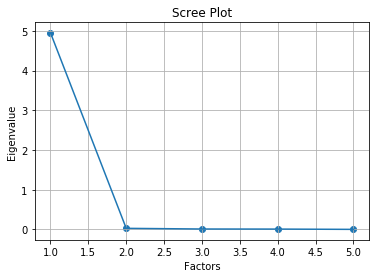

In [164]:
# Create scree plot using matplotlib
plt.scatter(range(1,excess_returns.shape[1]+1),ev)
plt.plot(range(1,excess_returns.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [165]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=2, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [166]:
fa.loadings_

array([[-0.03304121, -0.02364464],
       [-0.19841092,  0.09650404],
       [ 0.53207199, -0.00189334],
       [ 0.59683366, -0.02200426],
       [ 0.41345799, -0.11424452],
       [ 0.58873159, -0.14354476],
       [ 0.34442463, -0.0643662 ],
       [ 0.35867308, -0.01357551],
       [ 0.28857982, -0.11270369],
       [-0.33083468,  0.30638847],
       [-0.33922165,  0.36185578],
       [-0.43761846,  0.05433205],
       [-0.54645016,  0.26884703],
       [ 0.62631718,  0.00938613],
       [ 0.59461339, -0.15589905],
       [ 0.58961561, -0.01711167],
       [-0.05612133,  0.75406347],
       [-0.04842513,  0.74105388],
       [-0.03290573,  0.74937763],
       [-0.24406205,  0.62051176],
       [-0.08639529,  0.52625761],
       [ 0.37201073, -0.00188413],
       [-0.12951543,  0.1497041 ],
       [ 0.47408256,  0.02773459],
       [ 0.06729895,  0.23500672],
       [-0.18977157,  0.05895322]])

In [32]:
fa.get_eigenvalues()

(array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
        1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
        0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
        0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
        0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
        0.2622634 ]),
 array([ 4.62191839,  2.28859647,  1.58790406,  1.24418004,  0.99409393,
         0.52995489,  0.259123  ,  0.21162857,  0.12587991,  0.1063192 ,
         0.07945485,  0.04230637,  0.03296059,  0.02370407,  0.00743354,
        -0.02211494, -0.04170331, -0.04794389, -0.05856486, -0.06102634,
        -0.08061162, -0.08700374, -0.10017992, -0.10984112, -0.12540813,
        -0.15441251]))